In [63]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from PIL import Image

(a) Download and unzip The Face Dataset (faces.zip), You will find a folder called im ages which contains all the training and test images; train.txt and test.txt specifies the training set and test (validation) set split respectively, each line gives an image path and the corresponding label. 

(b) Load the training set into a matrix X: there are 540 training images in total, each has 50 × 50 pixels that need to be concatenated into a 2500-dimensional vector. So the size of X should be 540×2500, where each row is a flattened face image. Pick a face image from X and display that image in grayscale. Do the same thing for the test set. The size of matrix Xtest for the test set should be 100×2500. 


(540, 2500) (540,)


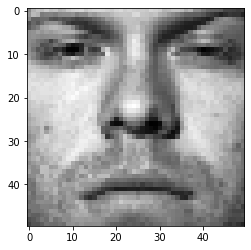

168.0


In [84]:
train_labels, train_data = [], []
for line in open('faces/train.txt'):
    im = Image.open(line.strip().split()[0])
    im = np.array(im)
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

print(train_data[10, 10])

(100, 2500) (100,)


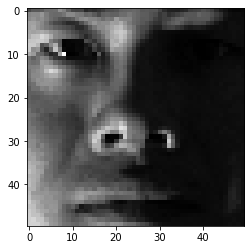

56.0


In [67]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = Image.open(line.strip().split()[0])
    im = np.array(im)
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

print(test_data[10, 10])

(c) Average Face. Compute the average face µ from the whole training set by summing up every
column in X then dividing by the number of faces. Display the average face as a grayscale
image.


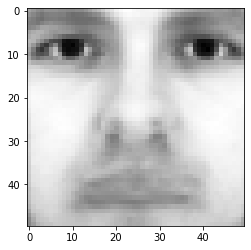

In [69]:
average_face = train_data.mean(axis=0)

plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

(d) Mean Subtraction. Subtract average face µ from every column in X. That is, xi
:= xi − µ,
where xi is the i-th column of X. Pick a face image after mean subtraction from the new X
and display that image in grayscale. Do the same thing for the test set Xtest using the precomputed
average face µ in (c).


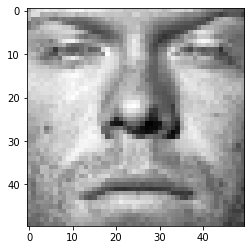

In [71]:
new_matrix = []

for x in train_data:
    new_matrix.append((x - average_face))
    
new_matrix = np.array(new_matrix)

plt.imshow(new_matrix[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()


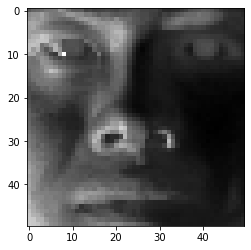

In [73]:

new_test_matrix = []

for x in test_data:
    new_test_matrix.append((x - average_face))
    
new_test_matrix = np.array(new_test_matrix)

plt.imshow(new_test_matrix[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(e) Eigenface. Perform eigendecomposition on XT X = VΛVTto get eigenvectors VT, where each row of VT has the same dimension as the face image. We refer to vi, the i-th row of VT, as i-th eigenface. Display the first 10 eigenfaces as 10 images in grayscale. 


(540, 2500)


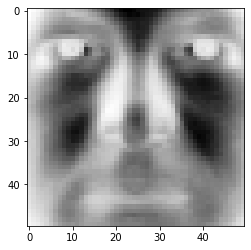

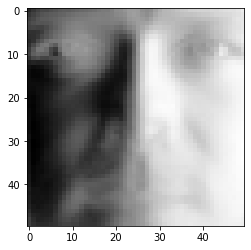

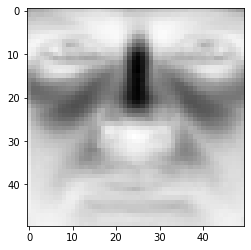

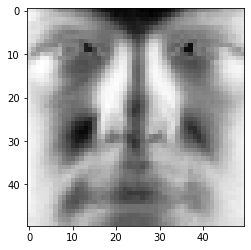

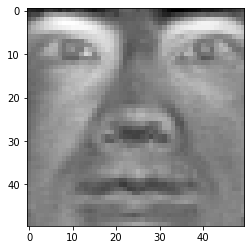

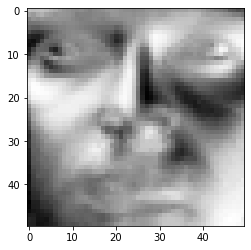

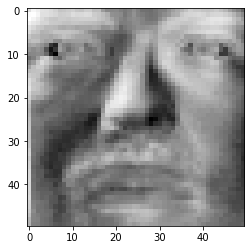

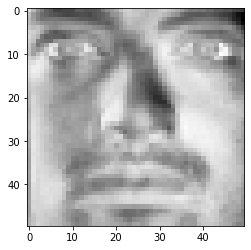

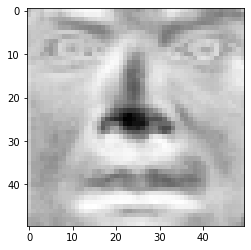

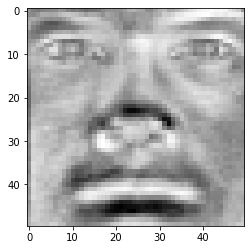

In [75]:
U, s, V = np.linalg.svd(new_matrix, full_matrices=False)
S = np.diag(s)
print(V.shape)

for i in range(10):
    plt.imshow(V[i, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

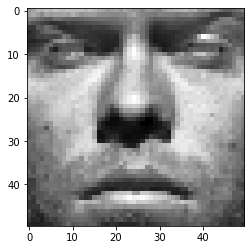

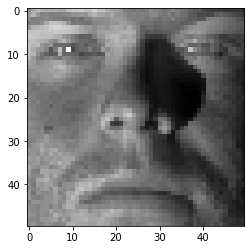

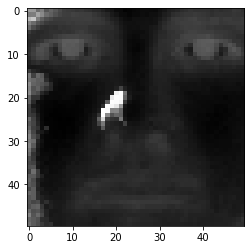

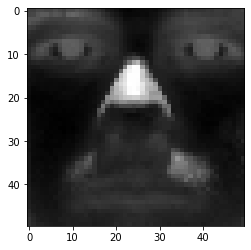

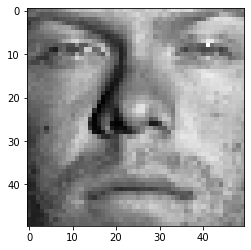

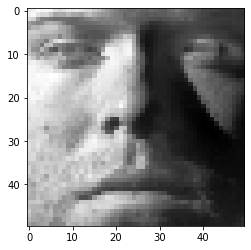

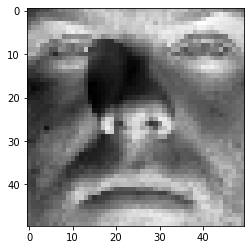

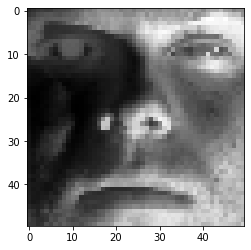

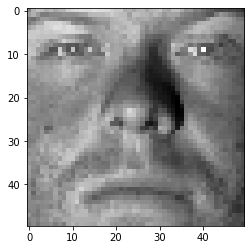

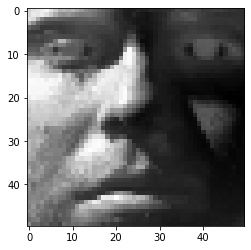

In [77]:
for i in range(10):
    plt.imshow(new_test_matrix[i, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

(f) Eigenface Feature. The top r eigenfaces VT\[: r,:] = {v1, v2,..., vr }Tspan an r -dimensional linear subspace of the original image space called face space, whose origin is the average face µ, and whose axes are the eigenfaces {v1, v2,..., vr }. Therefore, using the top r eigenfaces {v1, v2,..., vr }, we can represent a 2500-dimensional face image z as an r -dimensional fea ture vector f: f = VT\[: r,:] z = \[v1, v2,..., vr ]Tz. Write a function to generate r -dimensional feature matrix F and Ftest for training images X and test images Xtest, respectively (to get F, multiply X to the transpose of first r rows of VT, F should have same number of rows as X and r columns; similarly for Xtest). 


In [81]:

effs = []
def generateFeatureMatrix():
    for r in range(1, 201, 1):
        VT = V[:r,:].T
        F = np.dot(new_matrix,VT)
        effs.append(F)
    return effs
        
generateFeatureMatrix()

62e-01, -1.37696648e+01,  5.01241488e+01],
        [-1.36371277e+03, -2.93060527e+03, -1.28714465e+03, ...,
         -1.74803787e+01, -2.16519798e+01, -1.09339222e+01]]),
 array([[ 3071.98503336,   440.55436121,   127.39265075, ...,
            27.9222525 ,    -3.59133794,     8.21628574],
        [-2197.05744965,   760.60052365,   562.46174352, ...,
            58.15905942,   -14.31764059,     4.59280369],
        [-2473.33262159,  -163.06716256,  -608.22806399, ...,
           -17.33902919,   -25.98698221,    12.5154881 ],
        ...,
        [-1841.10091761, -1907.14587095,   226.44323   , ...,
            12.98925812,    14.27669217,    -8.53233842],
        [ 2586.30249394,  -163.15381029,   151.68973865, ...,
           -13.76966477,    50.12414884,    27.00015009],
        [-1363.71276667, -2930.60526623, -1287.14464964, ...,
           -21.65197984,   -10.93392222,   100.97622128]]),
 array([[ 3071.98503336,   440.55436121,   127.39265075, ...,
            -3.59133794,     8.2

In [82]:
ftest = []
def generateFeatureTestMatrix():
    for r in range(1, 201, 1):
        VT = V[:r,:].T
        F_test = np.dot(new_test_matrix,VT)
        ftest.append(F_test)
    return ftest

generateFeatureTestMatrix()

-1.97547669e+03, -5.30835552e+01, -1.56924329e+03, ...,
         -5.34438399e+01,  3.46174547e+01,  1.98848124e+01],
        [-6.99288660e+02, -1.78444521e+03,  8.83082635e+02, ...,
          7.60044605e+00, -3.16169853e+01, -5.63915986e+01],
        [ 2.89306329e+03, -3.42858431e+01,  1.17466461e+02, ...,
         -1.30132428e+01,  1.85456235e+01, -1.26722605e+01],
        ...,
        [-1.34300326e+02,  3.55148415e+03, -5.34447049e+02, ...,
          1.80246758e+01, -1.01672366e+00,  5.92753948e+01],
        [ 3.73568104e+02, -2.78559446e+03,  1.19699164e+03, ...,
          5.52528532e+01,  3.31970879e+01,  4.98024578e+01],
        [-3.57633319e+03,  1.29170341e+03,  4.64224199e+02, ...,
          2.39370761e+01, -1.26433883e+01,  7.58787734e+00]]),
 array([[-1.97547669e+03, -5.30835552e+01, -1.56924329e+03, ...,
          3.46174547e+01,  1.98848124e+01,  5.45390583e+01],
        [-6.99288660e+02, -1.78444521e+03,  8.83082635e+02, ...,
         -3.16169853e+01, -5.63915986e+01, -1.1

(g) Face Recognition. Extract training and test features for r = 10. Train a Logistic Re gression model using F and test on Ftest. Report the classification accuracy on the test set. Plot the classification accuracy on the test set as a function of r when r = 1, 2,..., 200. Use “one-vs-rest” logistic regression, where a classifier is trained for each possible output label. Each classifier is trained on faces with that label as positive data and all faces with other labels as negative data. sklearn calls this “ovr” mode. 


0.8


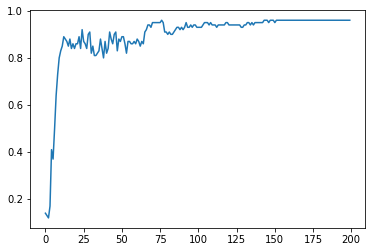

In [83]:

f_r10 = effs[9]
test_feature_ten = ftest[9]

OVR = OneVsRestClassifier(LogisticRegression()).fit(f_r10,train_labels)

print(OVR.score(test_feature_ten,test_labels))

accuracy = []

def classifier(r):
    OVR = OneVsRestClassifier(LogisticRegression()).fit(effs[r - 1],train_labels)
    accuracy.append(OVR.score(ftest[r - 1],test_labels))
    
for r in range(1, 201, 1):
    classifier(r)
    
plt.plot(accuracy)
plt.show()